<a href="https://colab.research.google.com/github/yohanesnuwara/petroleum-data-analytics-series/blob/main/02_WellFaciesClassification/dutch_wells_facies_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facies Classification on Dutch F3 Well Logs 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import pandas as pd

In [2]:
!git clone https://github.com/yohanesnuwara/petroleum-data-analytics-series

Cloning into 'petroleum-data-analytics-series'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 51 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (51/51), done.


In [3]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

In [4]:
# Load training data
path = '/content/petroleum-data-analytics-series/02_WellFaciesClassification/F02-1_logs.las'
data = np.loadtxt(path, skiprows=35)

# Remove -999.25 as NaNs
data[data==-999.2500] = np.nan

# Convert data array to dataframe
mneumonics = ['DEPTH', 'RHOB', 'DT', 'GR', 'AI', 'AIR', 'PHIE']
data = pd.DataFrame(data, columns=mneumonics)

data.head(10)

,DEPTH,RHOB,DT,GR,AI,AIR,PHIE
0,48.00,NaN,524.0485,NaN,3820257.00,-455.6956,NaN
1,48.15,NaN,524.0410,NaN,3820311.75,-455.6956,NaN
2,48.30,NaN,524.0336,NaN,3820366.25,-455.6956,NaN
3,48.45,NaN,524.0262,NaN,3820419.75,-455.6956,NaN
4,48.60,NaN,524.0190,NaN,3820472.25,-455.6956,NaN
5,48.75,NaN,524.0117,NaN,3820525.75,-455.6956,NaN
6,48.90,NaN,524.0042,NaN,3820580.00,-455.6956,NaN
7,49.05,NaN,523.9968,NaN,3820634.25,-455.6956,NaN
8,49.20,NaN,523.9893,NaN,3820688.75,-455.6956,NaN
9,49.35,NaN,523.9819,NaN,3820742.75,-455.6956,NaN


In [5]:
# Remove NaNs
data = data.dropna()

# Remove AI and AIR columns
data = data.drop(columns=['AI', 'AIR'])

data.head(10)

,DEPTH,RHOB,DT,GR,PHIE
3308,544.20,1897.7505,521.8398,46.3490,0.4702
3309,544.35,1950.1143,519.4737,46.2888,0.4375
3310,544.50,1968.0576,518.0292,46.2888,0.4262
3311,544.65,1984.5618,525.4709,49.1604,0.4159
3312,544.80,1974.3237,537.0573,56.4415,0.4223
3313,544.95,1984.2185,548.7537,65.9561,0.4161
3314,545.10,2044.5334,567.8348,67.5387,0.3784
3315,545.25,2055.3286,566.8513,67.5387,0.3717
3316,545.40,2047.6221,555.2444,66.1885,0.3765
3317,545.55,2038.2754,541.1078,62.0631,0.3823


In [6]:
# Load facies code
fcode = pd.read_csv('/content/petroleum-data-analytics-series/02_WellFaciesClassification/facies_code.csv')

fcode

,MARKER_DEPTH,FACIES
0,0,1
1,464,2
2,539,3
3,612,1
4,635,3
5,687,4
6,702,3
7,795,1
8,814,3
9,926,1


In [7]:
# Unwrap marker depths and facies
tb = fcode.MARKER_DEPTH.values
f = fcode.FACIES.values

# Assign facies code to train data
depth = data.DEPTH.values
facies=[]

for i in range(len(depth)):
    for j in range(len(tb)-1):
        if depth[i] > tb[j] and depth[i] <=tb[j+1]:
            facies.append(f[j])

data['FACIES'] = facies

data.head(10)

,DEPTH,RHOB,DT,GR,PHIE,FACIES
3308,544.20,1897.7505,521.8398,46.3490,0.4702,3
3309,544.35,1950.1143,519.4737,46.2888,0.4375,3
3310,544.50,1968.0576,518.0292,46.2888,0.4262,3
3311,544.65,1984.5618,525.4709,49.1604,0.4159,3
3312,544.80,1974.3237,537.0573,56.4415,0.4223,3
3313,544.95,1984.2185,548.7537,65.9561,0.4161,3
3314,545.10,2044.5334,567.8348,67.5387,0.3784,3
3315,545.25,2055.3286,566.8513,67.5387,0.3717,3
3316,545.40,2047.6221,555.2444,66.1885,0.3765,3
3317,545.55,2038.2754,541.1078,62.0631,0.3823,3


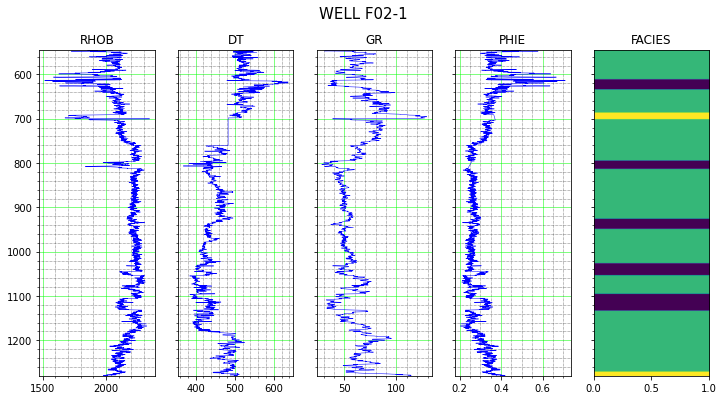

In [8]:
# Display logs with facies
logs = data.columns[1:]
rows,cols = 1,5
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,6), sharey=True)

plt.suptitle('WELL F02-1', size=15)
for i in range(cols):
    if i < cols-1:
        ax[i].plot(data[logs[i]], data.DEPTH, color='b', lw=0.5)
        ax[i].set_title('%s' % logs[i])
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        ax[i].set_ylim(max(data.DEPTH), min(data.DEPTH))
    elif i==cols-1:
        F = np.vstack((facies,facies)).T
        ax[i].imshow(F, aspect='auto', extent=[0,1,max(data.DEPTH), min(data.DEPTH)])
        ax[i].set_title('FACIES')

In [9]:
# Split training features and target
X_train = data[['RHOB', 'DT', 'GR', 'PHIE']]
y_train = data.FACIES

X_train

,RHOB,DT,GR,PHIE
3308,1897.7505,521.8398,46.3490,0.4702
3309,1950.1143,519.4737,46.2888,0.4375
3310,1968.0576,518.0292,46.2888,0.4262
3311,1984.5618,525.4709,49.1604,0.4159
3312,1974.3237,537.0573,56.4415,0.4223
...,...,...,...,...
8209,1994.3097,502.1868,114.1797,0.4098
8210,1991.3125,500.5999,114.1797,0.4117
8211,2010.7062,498.9934,113.0370,0.3996
8212,2003.3726,499.3086,112.5636,0.4041


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Create pipeline with standard scaler and KNN
pipe = make_pipeline(StandardScaler(), KNN(n_neighbors=5))

# Define stratified sampling CV 
cv = StratifiedKFold(5, shuffle=True)

# Cross-validation
cv_scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy')
mean_cv_scores = np.mean(cv_scores)
print('Accuracy mean from 5-fold CV:', mean_cv_scores)

Accuracy mean from 5-fold CV: 0.9021585272935262


In [11]:
# Fit model to training data
pipe.fit(X_train, y_train)

# Predict facies on training data
y_pred = pipe.predict(X_train)

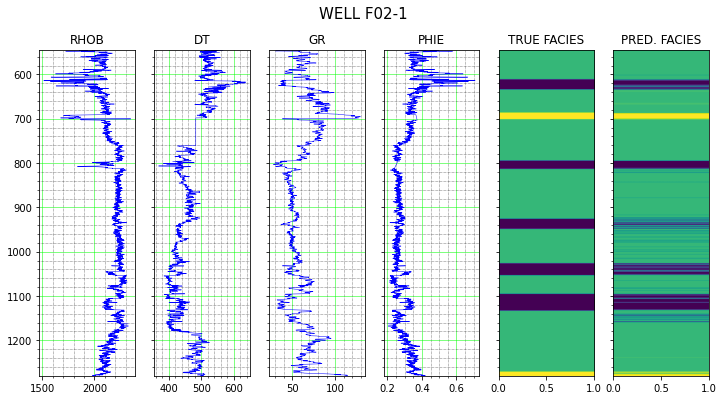

In [12]:
logs = X_train.columns
rows,cols = 1,6
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,6), sharey=True)

plt.suptitle('WELL F02-1', size=15)
for i in range(cols):
  if i < cols-2:
    ax[i].plot(data[logs[i]], data.DEPTH, color='b', lw=0.5)
    ax[i].set_title('%s' % logs[i])
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    ax[i].set_ylim(max(data.DEPTH), min(data.DEPTH))
  elif i==cols-2:
    F = np.vstack((facies,facies)).T
    ax[i].imshow(F, aspect='auto', extent=[0,1,max(data.DEPTH), min(data.DEPTH)])
    ax[i].set_title('TRUE FACIES')
  elif i==cols-1:
    F = np.vstack((y_pred,y_pred)).T
    ax[i].imshow(F, aspect='auto', extent=[0,1,max(data.DEPTH), min(data.DEPTH)])
    ax[i].set_title('PRED. FACIES')    

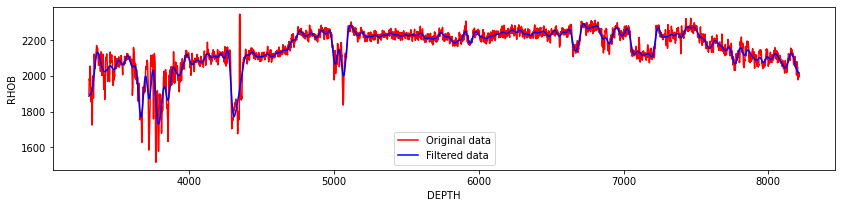

In [13]:
# Apply low pass filter, to smoothing, get rid of high frequencies
data['DTLP'] = butter_lowpass_filter(data.DT.values, 5, 1000/4, order=5) 
data['RHOBLP'] = butter_lowpass_filter(data.RHOB.values, 5, 1000/4, order=5) 
data['GRLP'] = butter_lowpass_filter(data.GR.values, 5, 1000/4, order=5) 
data['PHIELP'] = butter_lowpass_filter(data.PHIE.values, 5, 1000/4, order=5) 

plt.figure(figsize=(14,3))
plt.plot(data.RHOB, 'r', label='Original data')
plt.plot(data.RHOBLP, 'b', label='Filtered data')
plt.xlabel('DEPTH'); plt.ylabel('RHOB')
plt.legend(loc='lower center')
plt.show()

In [14]:
# Split training features and target
X_train = data[['RHOBLP', 'DTLP', 'GRLP', 'PHIELP']]
y_train = data.FACIES

X_train

,RHOBLP,DTLP,GRLP,PHIELP
3308,1887.024047,521.009833,44.950714,0.476902
3309,1888.309222,521.964597,45.043915,0.476095
3310,1889.546945,522.941277,45.173488,0.475318
3311,1890.730129,523.927238,45.335796,0.474575
3312,1891.855470,524.909925,45.527188,0.473868
...,...,...,...,...
8209,2018.692012,504.993849,112.243993,0.395079
8210,2018.093125,504.979163,112.425558,0.395469
8211,2017.583152,504.959182,112.575910,0.395801
8212,2017.154273,504.936312,112.698831,0.396081


In [15]:
# Cross-validation
cv_scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy')
mean_cv_scores = np.mean(cv_scores)
print('Accuracy mean from 5-fold CV:', mean_cv_scores)

Accuracy mean from 5-fold CV: 0.9779864264196931


In [16]:
# Fit model to training data
pipe.fit(X_train, y_train)

# Predict facies on training data
y_pred = pipe.predict(X_train)

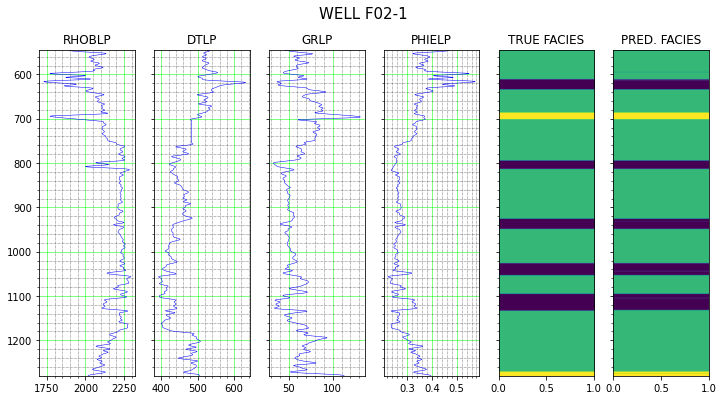

In [17]:
logs = X_train.columns
rows,cols = 1,6
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,6), sharey=True)

plt.suptitle('WELL F02-1', size=15)
for i in range(cols):
  if i < cols-2:
    ax[i].plot(data[logs[i]], data.DEPTH, color='b', lw=0.5)
    ax[i].set_title('%s' % logs[i])
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    ax[i].set_ylim(max(data.DEPTH), min(data.DEPTH))
  elif i==cols-2:
    F = np.vstack((facies,facies)).T
    ax[i].imshow(F, aspect='auto', extent=[0,1,max(data.DEPTH), min(data.DEPTH)])
    ax[i].set_title('TRUE FACIES')
  elif i==cols-1:
    F = np.vstack((y_pred,y_pred)).T
    ax[i].imshow(F, aspect='auto', extent=[0,1,max(data.DEPTH), min(data.DEPTH)])
    ax[i].set_title('PRED. FACIES')    

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


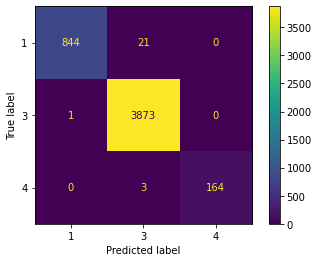

In [18]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipe, X_train, y_train)

Predict on blind well F03-2

In [19]:
# Load test data
path = '/content/petroleum-data-analytics-series/02_WellFaciesClassification/F03-2_logs.las'
test = np.loadtxt(path, skiprows=35)

test[test==-999.2500] = np.nan
mneumonics = ['DEPTH', 'RHOB', 'DT', 'GR', 'AI', 'AIR', 'PHIE']
test = pd.DataFrame(test, columns=mneumonics)
test = test.dropna()
test = test.drop(columns=['AI', 'AIR'])

test

,DEPTH,RHOB,DT,GR,PHIE
1,30.1500,2048.8999,524.9269,13.6972,0.3757
2,30.3000,2048.8999,524.9194,13.7762,0.3757
3,30.4500,2048.8999,524.9120,14.6424,0.3757
4,30.6000,2048.8999,524.9048,16.3448,0.3757
5,30.7500,2048.8999,524.8975,17.2740,0.3757
...,...,...,...,...,...
9819,1502.8501,2079.5254,507.5121,57.4739,0.3565
9820,1503.0000,2082.3804,505.9146,54.3907,0.3548
9821,1503.1500,2076.4177,509.2799,47.7548,0.3585
9822,1503.3000,2081.9536,506.1183,46.7720,0.3550


In [20]:
# Apply the same filters to test data
test['DTLP'] = butter_lowpass_filter(test.DT.values, 5, 1000/4, order=5) 
test['RHOBLP'] = butter_lowpass_filter(test.RHOB.values, 5, 1000/4, order=5) 
test['GRLP'] = butter_lowpass_filter(test.GR.values, 5, 1000/4, order=5) 
test['PHIELP'] = butter_lowpass_filter(test.PHIE.values, 5, 1000/4, order=5) 

In [21]:
# Define test set
X_test = test[['RHOBLP', 'DTLP', 'GRLP', 'PHIELP']]

# Predict on test set
y_pred = pipe.predict(X_test)

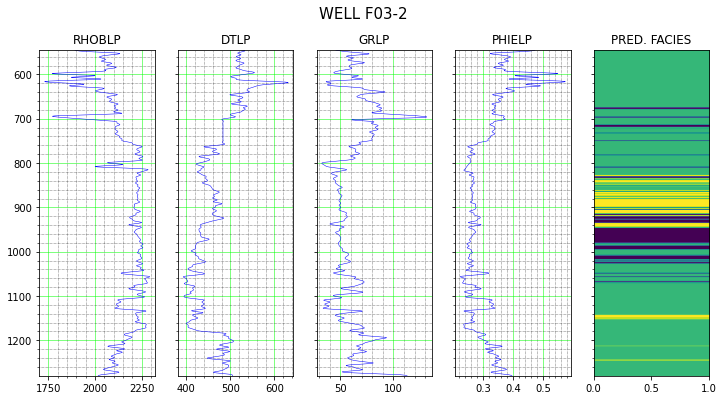

In [22]:
logs = X_test.columns
rows,cols = 1,5
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,6), sharey=True)

plt.suptitle('WELL F03-2', size=15)
for i in range(cols):
  if i < cols-1:
    ax[i].plot(data[logs[i]], data.DEPTH, color='b', lw=0.5)
    ax[i].set_title('%s' % logs[i])
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    ax[i].set_ylim(max(data.DEPTH), min(data.DEPTH))
  elif i==cols-1:
    F = np.vstack((y_pred,y_pred)).T
    ax[i].imshow(F, aspect='auto', extent=[0,1,max(data.DEPTH), min(data.DEPTH)])
    ax[i].set_title('PRED. FACIES')    